In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [3]:
vocabulary_size = 5000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)

In [4]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

embedding_size = 32

In [6]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length = max_words))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))

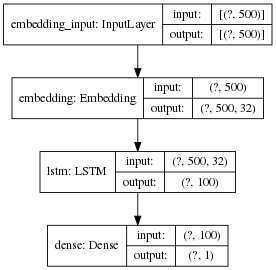

In [7]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 64)

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

batch_size = 64
num_epochs = 3

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]  
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

In [9]:
model.fit(X_train2, y_train2,
          validation_data = (X_valid, y_valid),
          batch_size = batch_size, epochs = num_epochs)

Epoch 1/3
390/390 [==============================] - 14s 35ms/step - loss: 0.4860 - accuracy: 0.7586 - val_loss: 0.2676 - val_accuracy: 0.9531
Epoch 2/3
390/390 [==============================] - 13s 34ms/step - loss: 0.2856 - accuracy: 0.8872 - val_loss: 0.2605 - val_accuracy: 0.9062
Epoch 3/3
390/390 [==============================] - 13s 33ms/step - loss: 0.2893 - accuracy: 0.8839 - val_loss: 0.2382 - val_accuracy: 0.9062


In [10]:
idx = np.random.choice(X_train.shape[0])
review = " ".join([id2word[i] for i in X_train[idx] if i])
if model.predict(np.reshape(X_train[idx], (1,-1))) < 0.5:
    label = 'negative'
else:
    label = 'positive'
print(review + '\n\nis ' + label)

the was society as mystery into also we and who of quirky you acts and as trek not was into constructed as you i i of profound it look is had very you of love interesting point try invisible not of homage he very to of and very america have can ideal and and his for watching so quirky this as taylor not of becomes horror very to of little find actor and find is him mark profound that end in and when defense end in and and that city me is married russian wrong not from off much film that when from after to charles of films much though for lose i i of here

is positive
